In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

In [5]:
survey_table = Table.read_table("Survey_Answers.csv")
survey_table = survey_table.select(6,7,8,9)
survey_table = survey_table.relabeled(0, "8 Hours Necessary?")
survey_table = survey_table.relabeled(1, "Average Screen Time (Hours)")
survey_table = survey_table.relabeled(2, "Average Sleep Time (Hours)")
survey_table = survey_table.relabeled(3, "Primary Source")
survey_table


8 Hours Necessary?,Average Screen Time (Hours),Average Sleep Time (Hours),Primary Source
No,4,5-6,"Social Media (TikTok, Instagram, etc.)"
Yes,2,7-8,TV/YouTube/Streaming
Yes,7,9-10,"Social Media (TikTok, Instagram, etc.)"
Yes,2,7-8,Video Games
No,3,5-6,"Social Media (TikTok, Instagram, etc.)"
Yes,3,7-8,"Social Media (TikTok, Instagram, etc.)"
Yes,5,7-8,TV/YouTube/Streaming
Yes,7,5-6,Video Games
Yes,4,7-8,Video Games
No,8,5-6,TV/YouTube/Streaming


68.0% of people say 8 hours is necessary, 32.0% of people say 8 hours isn't necessary.


8 Hours Necessary?,count
No,8
Yes,17


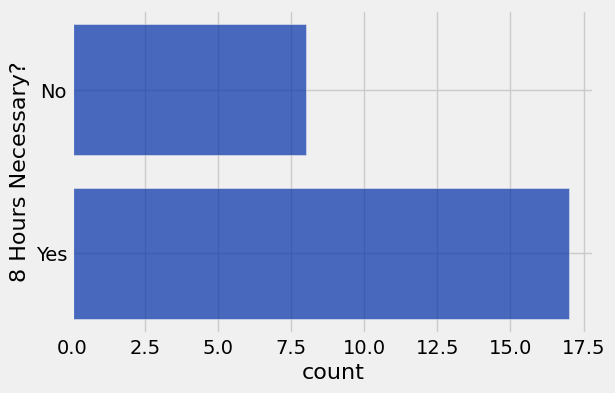

In [27]:
#Percent of people's choices on if 8 hours is necessary.
total_length = len(survey_table.column("8 Hours Necessary?"))
grouped_table = survey_table.group("8 Hours Necessary?")
count_arr = grouped_table.column("count")

percent_no = count_arr.item(0) / total_length * 100
percent_yes = count_arr.item(1) / total_length * 100


print(f"{percent_yes}% of people say 8 hours is necessary, {percent_no}% of people say 8 hours isn't necessary.")
grouped_table.barh("8 Hours Necessary?", "count")
grouped_table

Changed "10+" to just "10" to allowing for conversion to integers

In [ ]:
screen_time_arr = survey_table.column(1)
cleaned = []
for x in screen_time_arr:
    cleaned.append(x.rstrip("+"))

ints = []
for x in cleaned:
    ints.append(int(x))

In [ ]:
#Bootstrap with Hours of Screen Time
observed_mean = np.average(ints)
print(observed_mean)

def one_bootstrap_mean():
    bootstrap_table = survey_table.sample()
    return np.average(bootstrap_table.column(1))

5.84


6.7999999999999998

In [30]:
bootstrap_means = make_array()
for i in np.arange(100):
    bootstrap_means = np.append(bootstrap_means, one_bootstrap_mean())
bootstrap_means

array([ 6.72,  5.64,  6.  ,  5.92,  5.68,  6.08,  4.84,  5.72,  6.88,
        6.04,  6.12,  6.08,  6.08,  5.8 ,  5.88,  5.76,  5.32,  6.  ,
        6.2 ,  6.68,  6.04,  6.36,  5.24,  6.36,  4.92,  6.12,  6.  ,
        5.8 ,  6.2 ,  5.44,  5.24,  5.36,  6.56,  5.84,  5.48,  5.96,
        6.52,  6.4 ,  6.48,  5.88,  5.28,  5.56,  5.68,  5.68,  5.08,
        6.24,  5.88,  6.2 ,  6.8 ,  6.36,  6.04,  6.08,  5.52,  6.16,
        6.36,  6.68,  5.84,  6.  ,  6.  ,  6.04,  6.08,  6.36,  5.44,
        5.04,  6.76,  4.52,  5.8 ,  5.72,  5.08,  5.52,  5.76,  5.2 ,
        5.84,  5.28,  6.16,  5.88,  5.44,  4.6 ,  6.  ,  5.92,  5.16,
        5.84,  5.6 ,  5.08,  5.68,  6.36,  5.2 ,  5.68,  6.6 ,  6.92,
        5.92,  6.  ,  5.52,  5.2 ,  6.32,  5.88,  6.32,  5.6 ,  5.32,  5.32])

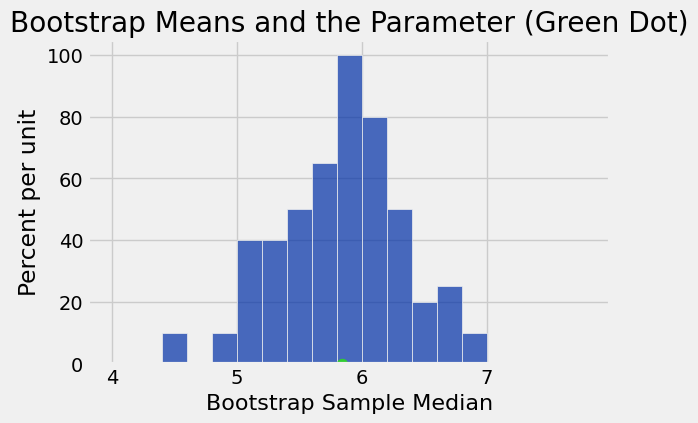

In [56]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_means)

median_bins=np.arange(4,8,.2)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
#plots.ylim(-0.000005, 0.0015)
plots.scatter(observed_mean, 0, color=parameter_green, s=60, zorder=2)
plots.title('Bootstrap Means and the Parameter (Green Dot)');

In [42]:
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

make_array(left, right)

array([ 4.84,  6.8 ])

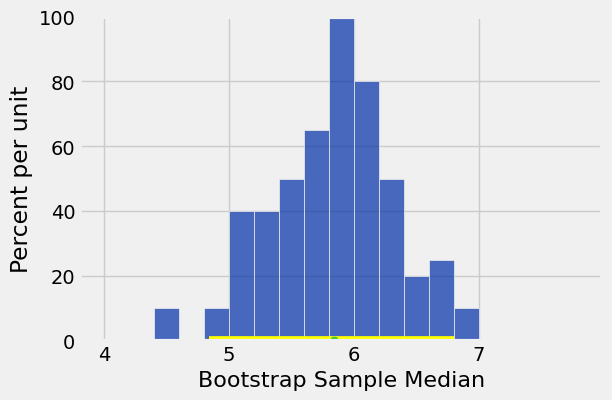

In [53]:
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
plots.ylim(0, 1)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=7, zorder=1)
plots.scatter(observed_mean, 0, color=parameter_green, s=40, zorder=2);

We are 95% confident that the mean average amount of screen time in hours is in between 4.84 and 6.8.

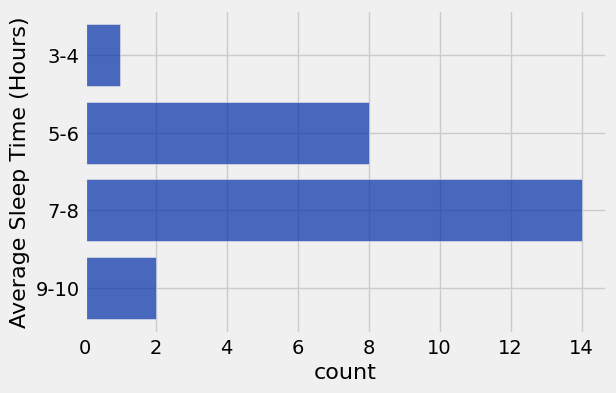

In [55]:
#Bar Graph for Average Sleep Time
sleep_group = survey_table.group("Average Sleep Time (Hours)")
sleep_group.barh("Average Sleep Time (Hours)")

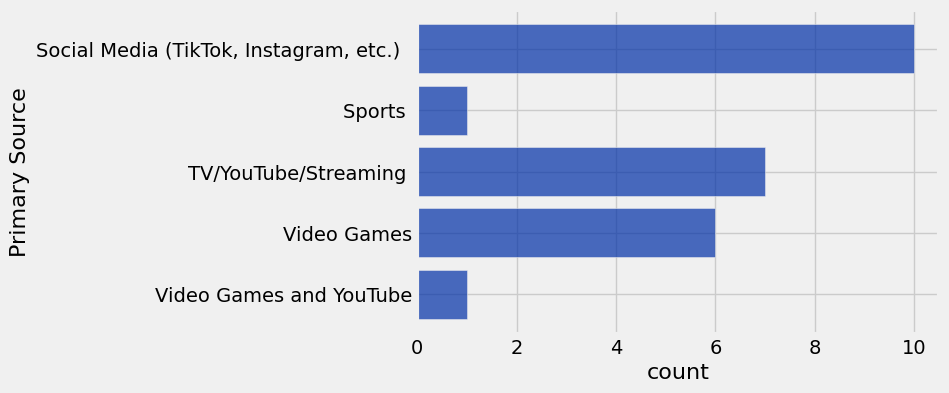

In [26]:
#Bar Graph of primary source
grouped_primary = survey_table.group("Primary Source")
grouped_primary.barh("Primary Source", "count")